In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print mnist.train.images.shape

(55000, 784)


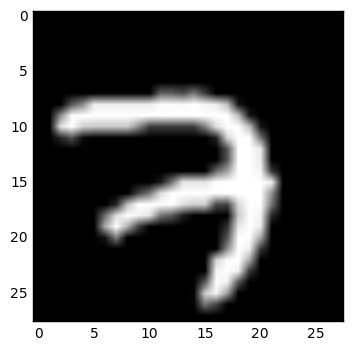

In [4]:
from matplotlib import pyplot as plt
plt.figure()
img = mnist.train.images[0].reshape((28,28)) #preleviamo la prima immagine di training ed effettuiamo un reshape

plt.imshow(img,cmap='gray')
plt.show()

In [5]:
print mnist.train.labels.shape

(55000, 10)


In [6]:
print mnist.train.labels[0]

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [7]:
print mnist.train.labels[0].argmax()

7


# Esercizo 3.1
Visualizzare una immagine del validation set e una del test set insieme alle relative etichette.

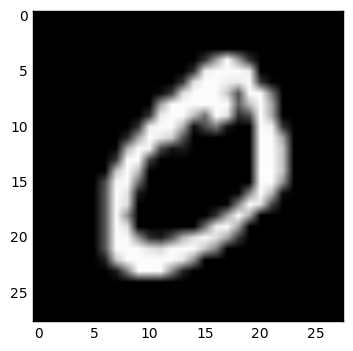

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0


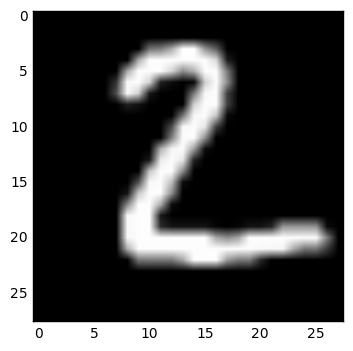

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
2


In [10]:
img = mnist.validation.images[1].reshape((28,28)) 
plt.imshow(img,cmap='gray')
plt.show()
print mnist.validation.labels[1]
print mnist.validation.labels[1].argmax()
img = mnist.test.images[1].reshape((28,28))
plt.imshow(img,cmap='gray')
plt.show()
print mnist.test.labels[1]
print mnist.test.labels[1].argmax()

In [23]:
import tensorflow as tf
a = tf.constant(1.) # inseriamo "1." invece di "1" perché vogliamo che venga visto come un float
b = tf.constant(5.) 
c = tf.constant(2.)
d = tf.constant(5.)
e = tf.constant(6.)

result = ((a+b+c)*d)/6 # result è il nome del tensore che conterrà il risultato

In [24]:
sess = tf.Session()

In [25]:
r = sess.run(result)
print r

6.66667


In [26]:
x = a+b+c
y = x*d
result = y/6

In [27]:
print sess.run(x)
print sess.run(y)
print sess.run(result)
#sess.close()

8.0
40.0
6.66667


In [28]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)
d = tf.placeholder(tf.float32)
e = tf.placeholder(tf.float32)
result = ((a+b+c)*d)/6

In [29]:
sess = tf.Session()
print sess.run(result,feed_dict={a:1,b:5,c:2,d:5,e:6})
sess.close()

6.66667


In [30]:
var = tf.Variable(0)

In [31]:
init = tf.initialize_all_variables() # questo nodo inizializza tutte le variabili

In [32]:
sess = tf.Session()
sess.run(init)
print sess.run(var)

0


In [33]:
inc = tf.assign(var,var+1)

In [34]:
sess.run(inc)

1

In [35]:
for i in range(3):
    print sess.run(inc)

2
3
4


In [36]:
x = tf.placeholder(tf.float32, [None, 784])

In [37]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [38]:
scores = tf.matmul(x,W)+b

In [39]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [40]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [41]:
loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [42]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #0.1 è il learning rate

In [43]:
init = tf.initialize_all_variables()

In [44]:
sess = tf.Session()
sess.run(init)

In [45]:
losses = list()
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _,l=sess.run([train_step,loss], feed_dict={x: batch_xs, y_: batch_ys})
    losses.append(l)

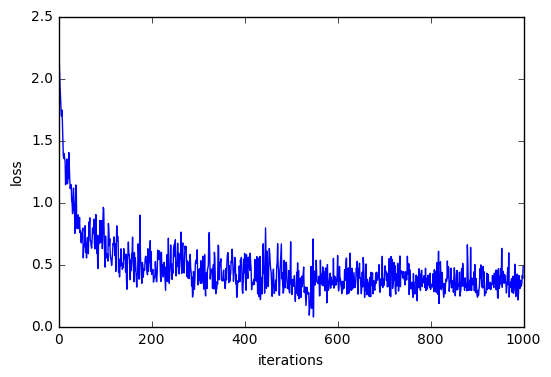

In [46]:
plt.figure()
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()


In [47]:
predicted_probabilities=sess.run(y,feed_dict={x:mnist.train.images})
print predicted_probabilities.shape
print predicted_probabilities[0]

(55000, 10)
[  5.89543706e-05   8.00124544e-04   4.88163857e-03   6.24106042e-02
   1.03789689e-02   1.29418343e-03   1.23122707e-04   1.94330499e-01
   1.94976032e-02   7.06224322e-01]


In [48]:
predicted_labels = predicted_probabilities.argmax(1)
print predicted_labels[0]

9


In [49]:
gt_labels = mnist.train.labels.argmax(1)
acc = (predicted_labels==gt_labels).mean()
print acc

0.902890909091


In [50]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [51]:
print sess.run(correct_prediction,feed_dict={x:mnist.train.images,y_:mnist.train.labels})

[False  True  True ...,  True  True  True]


In [52]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #il cast a float è necessario per evitare la divisione intera

In [58]:
print sess.run(accuracy,feed_dict={x:mnist.train.images,y_:mnist.train.labels})

0.902891


# Esercizio 5.1
Calcolare l'accuracy anche su test e validation set.

In [63]:
print "Test set:", sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print "Validation set:", sess.run(accuracy,feed_dict={x:mnist.validation.images,y_:mnist.validation.labels})

Test set: 0.9096
Validation set: 0.9102


In [64]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [66]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [67]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [68]:
x_image = tf.reshape(x, [-1,28,28,1])

In [69]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [70]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [71]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [72]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [73]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [74]:
y = tf.nn.softmax(y_conv)

In [75]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [76]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [77]:
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [78]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [79]:
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%10 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    sess.run(train_step,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.08
step 10, training accuracy 0.3
step 20, training accuracy 0.34
step 30, training accuracy 0.68
step 40, training accuracy 0.62
step 50, training accuracy 0.7
step 60, training accuracy 0.7
step 70, training accuracy 0.86
step 80, training accuracy 0.72
step 90, training accuracy 0.84
step 100, training accuracy 0.76
step 110, training accuracy 0.88
step 120, training accuracy 0.84
step 130, training accuracy 0.84
step 140, training accuracy 0.84
step 150, training accuracy 0.9
step 160, training accuracy 0.98
step 170, training accuracy 0.84
step 180, training accuracy 0.92
step 190, training accuracy 0.78
step 200, training accuracy 0.98
step 210, training accuracy 0.9
step 220, training accuracy 0.92
step 230, training accuracy 0.9
step 240, training accuracy 0.88
step 250, training accuracy 0.86
step 260, training accuracy 0.98
step 270, training accuracy 0.82
step 280, training accuracy 0.86
step 290, training accuracy 0.94
step 300, training accuracy

# Esercizio 6.1 
Calcolare l'accuracy di validation e test. 
Suggerimento: potrebbe essere necessario valutare l'accuracy per mini batch

In [81]:
validation_accuracy = sess.run(accuracy, feed_dict={x:mnist.validation.images, y_:mnist.validation.labels,
                                                    keep_prob: 1.0})
print validation_accuracy

0.9636


In [82]:
test_accuracy = sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels,keep_prob: 1.0})
print test_accuracy

0.9607
